CLIP(Contrastive Language-Image Pre-training): Multi-modal model from OpenAI

In [1]:
!git clone https://github.com/openai/CLIP.git

Cloning into 'CLIP'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 195 (delta 12), reused 22 (delta 9), pack-reused 168
Receiving objects: 100% (195/195), 8.91 MiB | 26.90 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [2]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-781tw9rc
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-781tw9rc
     |████████████████████████████████| 53 kB 736 kB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369221 sha256=7aab8a7a895e53d50b678ba658f6fe83016ca7daffee4ef98cf6e4e9ace75e30
  Stored in directory: /tmp/pip-ephem-wheel-cache-34_bzs_j/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [3]:
!pip install ftfy regex tqdm

In [4]:
import torch
import torch.nn as nn
from torch.nn import CosineSimilarity as CosSim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms.functional as TF
from torchvision.datasets import CIFAR100

import os
import requests
from glob import glob
from tqdm import tqdm
import random
from io import BytesIO

import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import imageio

import clip

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
model, preprocess = clip.load("ViT-B/32", device=device) 

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 54.1MiB/s]


# Image-Text Similarity

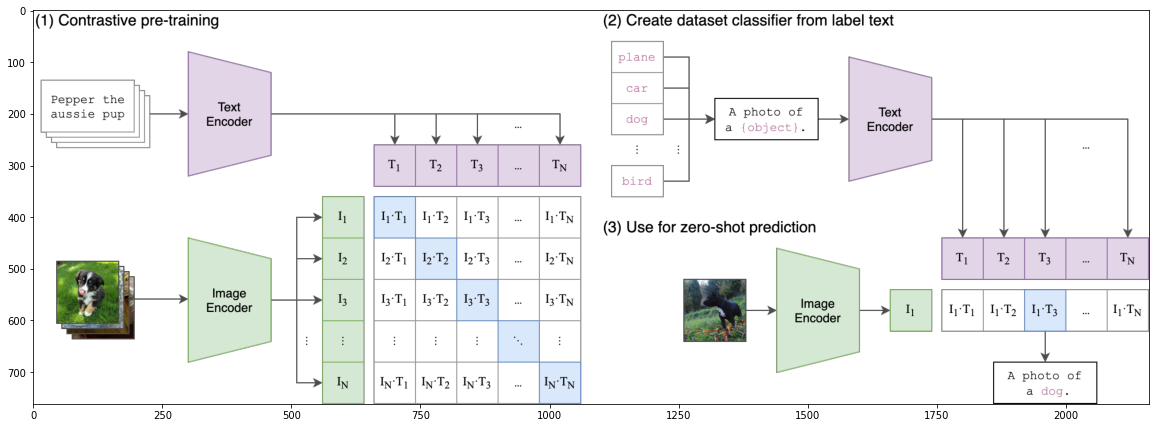

In [7]:
image_path = "./CLIP/CLIP.png" 
plt.figure(figsize=(20, 20))  
plt.imshow(Image.open(image_path)) 
plt.show()

In [8]:
# preprocess: Resize(224,224), Normalization
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

In [9]:
text_dataset = ['a diagram', 'a dog', 'a cat']

text = clip.tokenize(text_dataset).to(device)

In [10]:
# 각 이미지와 텍스트의 유사도

with torch.no_grad():

    logits_per_image, _ = model(image, text)

    probs = logits_per_image.softmax(dim=-1).cpu().numpy().flatten()

print('Image-Text similarity')
for idx in range(len(text_dataset)):
    print(f'\t{text_dataset[idx]}: {logits_per_image.cpu().numpy().flatten()[idx]:.2f}')

print('Image-Text similarity in probability')
for idx in range(len(text_dataset)):
    print(f'\t{text_dataset[idx]}: {round(probs[idx]*100, 3):.2f}%')

Image-Text similarity
	a diagram: 25.55
	a dog: 20.09
	a cat: 19.75
Image-Text similarity in probability
	a diagram: 99.27%
	a dog: 0.42%
	a cat: 0.30%


(564, 569, 4)


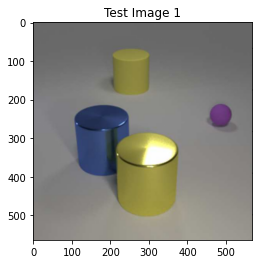

tensor([[49406,   320,  1125,   539,   272, 13770, 49407,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [49406,   320,  1125,   539,   274, 13770, 49407,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0, 

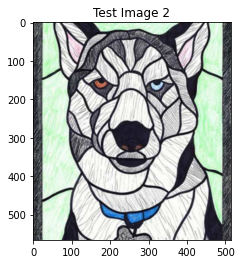

tensor([[49406,   320,  1125,   539,   320,  4710, 13242,  1929, 49407,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [49406,   320,  1125,   539,   320, 30611, 49407,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0, 

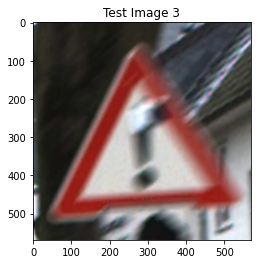

tensor([[49406,   320,  4397, 16835,   530,  1125,   539,   320,   257,   736,
           537,  1579, 14615,   593,   659, 21793,  2110,  4994,   257,  3399,
          2292, 49407,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [49406,   320,  4397, 16835,   530,  1125,   539,   320,   257,   736,
           537,  1579, 14615,   593,  1449,  1155, 15792, 12164,  4994,   257,
          3399,  2292, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0, 

In [11]:
image_urls = ['https://url.kr/qcutfr',
              'https://url.kr/m745rv',
              'https://url.kr/i3u6yd']

texts = [["a photo of 1 objects", "a photo of 3 objects", "a photo of 4 objects", "a photo of 5 objects", "a photo of 10 objects"],
         ["a photo of a german shepherd dog", "a photo of a collie", "a photo of a border collie", "a photo of a siberian husky", "a photo of a rottweiler"],
         ["a zoomed in photo of a \"red and white triangle with exclamation mark warning\" traffic sign", 
          "a zoomed in photo of a \"red and white triangle with black right curve approaching warning\" traffic sign", 
          "a zoomed in photo of a \"red and white triangle car skidding / slipping warning\" traffic sign", 
          "a zoomed in photo of a \"red and white triangle rough / bumpy road warning\" traffic sign", 
          "a zoomed in photo of a \"red and white triangle with black left curve approaching warning\" traffic sign"]]

labels = [2, 3, 0]

for idx, path in enumerate(image_urls):
    
    img = Image.open(BytesIO(requests.get(path).content))

    print(np.array(img).shape)

    plt.figure(figsize=(4,4))
    plt.title(f'Test Image {idx+1}')
    plt.imshow(img)
    plt.show()

    image = preprocess(img).unsqueeze(0).to(device)
    text_dataset = texts[idx]
    text = clip.tokenize(text_dataset).to(device) 
    print(text) # tokenized texts to compare against image

    with torch.no_grad():
        logits_per_image, _ = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy().flatten()

    print('Image-Text similarity')
    for i in range(len(text_dataset)):
        print(f'\t{text_dataset[i]}: {logits_per_image.cpu().numpy().flatten()[i]:.2f}')

    print('Image-Text similarity in probability')
    for i in range(len(text_dataset)):
        if i==labels[idx]:
            print(f'\t{text_dataset[i]}: {round(probs[i]*100, 3):.2f}% - GT')
        else:
            print(f'\t{text_dataset[i]}: {round(probs[i]*100, 3):.2f}%')            

In [12]:
# 1. image_encoder(image) -> image_feature_vector
# 2. text_encoder(text) -> text_feature_vector
# 3. model(image_feature_vector, text_feature_vector) -> similarity

# image, text
image_path = "./CLIP/CLIP.png" 
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device) 
text_dataset = ["a diagram", "a dog", "a cat"]
text = clip.tokenize(text_dataset).to(device) 

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
print(image_features.shape, text_features.shape)

torch.Size([1, 512]) torch.Size([3, 512])


In [13]:
# feature vector의 유사도 계산에 cosine similarity 함수 사용
cos_sim = CosSim(dim=1)

In [14]:
logits = cos_sim(image_features, text_features)*100
probs = logits.softmax(dim=-1).cpu().numpy().flatten()

print('Image-Text similarity')
for idx in range(len(text_dataset)):
    print(f'\t{text_dataset[idx]}: {logits.cpu().numpy().flatten()[idx]:.2f}')

print('Image-Text similarity in probability')
for idx in range(len(text_dataset)):
    print(f'\t{text_dataset[idx]}: {round(probs[idx]*100, 3):.2f}%')

Image-Text similarity
	a diagram: 25.56
	a dog: 20.09
	a cat: 19.77
Image-Text similarity in probability
	a diagram: 99.27%
	a dog: 0.42%
	a cat: 0.30%


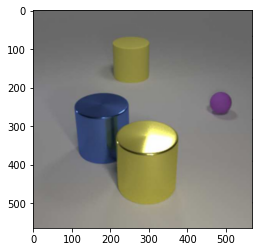

torch.Size([1, 512]) torch.Size([5, 512])
Image-Text similarity
	a photo of 1 objects: 25.34
	a photo of 3 objects: 27.03
	a photo of 4 objects: 27.34
	a photo of 5 objects: 27.05
	a photo of 10 objects: 25.78
Image-Text similarity in probability
	a photo of 1 objects: 4.80%
	a photo of 3 objects: 25.95%
	a photo of 4 objects: 35.47%
	a photo of 5 objects: 26.37%
	a photo of 10 objects: 7.43%


In [15]:
image_url = "https://url.kr/qcutfr"
img = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(img)
plt.show()
image = preprocess(img).unsqueeze(0).to(device) 

text_dataset = ["a photo of 1 objects", "a photo of 3 objects", "a photo of 4 objects", "a photo of 5 objects", "a photo of 10 objects"]
text = clip.tokenize(text_dataset).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text) 

print(image_features.shape, text_features.shape) 

logits = cos_sim(image_features, text_features)*100
probs = logits.softmax(dim=-1).cpu().numpy().flatten()

print('Image-Text similarity')
for idx in range(len(text_dataset)):
    print(f'\t{text_dataset[idx]}: {logits.cpu().numpy().flatten()[idx]:.2f}')

print('Image-Text similarity in probability')
for idx in range(len(text_dataset)):
    print(f'\t{text_dataset[idx]}: {round(probs[idx]*100, 3):.2f}%')

# Zero-shot Image Classification

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./CIFAR/cifar-100-python.tar.gz to ./CIFAR


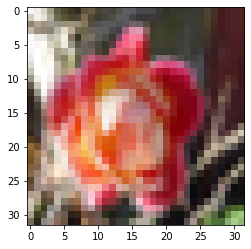

Top predictions:
           tulip: 25.76%
      maple_tree: 21.03%
            rose: 8.50%
    sweet_pepper: 6.72%
          orchid: 6.51%
           poppy: 5.07%
        oak_tree: 4.77%
       pine_tree: 2.08%
     willow_tree: 1.75%
       palm_tree: 1.62%


In [16]:
cifar100 = CIFAR100(root=os.path.expanduser("./CIFAR"), download=True, train=False)

text_inputs = torch.cat([clip.tokenize(c) for c in cifar100.classes]).to(device)

# image_index ranges from 0 to 9999
image_index = 9999
image, _ = cifar100[image_index]
plt.imshow(image)
plt.show()

image_inputs = preprocess(image).unsqueeze(0).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_inputs)
    text_features = model.encode_text(text_inputs)

similarity = cos_sim(image_features, text_features)*100

K = 10 
values, indices = similarity.softmax(dim=-1).topk(K)  
print("Top predictions:") 
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100*value.item():.2f}%") 

# Text2Image Image Generation

In [17]:
#@title 필요 패키지 및 모델 정의
try: 
  !pip3 install googletrans==3.1.0a0
  from googletrans import Translator, constants
  from pprint import pprint
  translator = Translator()
except: pass

from IPython import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import glob
from google.colab import output
import torch.nn as nn

!mkdir frames
import moviepy.editor as mpy
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter
from google.colab import files
import warnings
from IPython.display import clear_output

def displ(img, pre_scaled=True):
  img = np.array(img)[:,:,:]
  img = np.transpose(img, (1, 2, 0))
  if not pre_scaled:
    img = scale(img, 48*4, 32*4)
  imageio.imwrite('result.png', np.array(img))
  file_path = '/content/CLIP/frames/{}.png'.format(str(len(os.listdir('/content/CLIP/frames'))).zfill(5))
  imageio.imwrite(file_path, np.array(img))
  return display.Image('result.png')

def card_padded(im, to_pad=3):
  return np.pad(np.pad(np.pad(im, [[1,1], [1,1], [0,0]],constant_values=0), [[2,2], [2,2], [0,0]],constant_values=1),
            [[to_pad,to_pad], [to_pad,to_pad], [0,0]],constant_values=0)

class SineLayer(nn.Module):
    def __init__(self, in_features, out_features, bias=True,
                 is_first=False, omega_0=30):
        super().__init__()
        self.omega_0 = omega_0
        self.is_first = is_first
        
        self.in_features = in_features
        self.linear = nn.Linear(in_features, out_features, bias=bias)
        
        self.init_weights()
    
    def init_weights(self):
        with torch.no_grad():
            if self.is_first:
                self.linear.weight.uniform_(-1 / self.in_features, 
                                             1 / self.in_features)      
            else:
                self.linear.weight.uniform_(-np.sqrt(6 / self.in_features) / self.omega_0, 
                                             np.sqrt(6 / self.in_features) / self.omega_0)
        
    def forward(self, input):
        return torch.sin(self.omega_0 * self.linear(input))
    
    def forward_with_intermediate(self, input): 
        intermediate = self.omega_0 * self.linear(input)
        return torch.sin(intermediate), intermediate
    
class Siren(nn.Module):
    def __init__(self, in_features, hidden_features, hidden_layers, out_features, outermost_linear=True, 
                 first_omega_0=30, hidden_omega_0=30.):
        super().__init__()
        
        self.net = []
        self.net.append(SineLayer(in_features, hidden_features, 
                                  is_first=True, omega_0=first_omega_0))

        for i in range(hidden_layers):
            self.net.append(SineLayer(hidden_features, hidden_features, 
                                      is_first=False, omega_0=hidden_omega_0))

        if outermost_linear:
            final_linear = nn.Linear(hidden_features, out_features)
            
            with torch.no_grad():
                final_linear.weight.uniform_(-np.sqrt(6 / hidden_features) / hidden_omega_0, 
                                              np.sqrt(6 / hidden_features) / hidden_omega_0)
                
            self.net.append(final_linear)
        else:
            self.net.append(SineLayer(hidden_features, out_features, 
                                      is_first=False, omega_0=hidden_omega_0))
        
        self.net = nn.Sequential(*self.net)
    
    def forward(self, coords):
        coords = coords.clone().detach().requires_grad_(True)
        output = self.net(coords.cuda())
        return output.view(1, sideX, sideY, 3).permute(0, 3, 1, 2)

    def forward_with_activations(self, coords, retain_grad=False):
        '''Returns not only model output, but also intermediate activations.
        Only used for visualizing activations later!'''
        activations = OrderedDict()

        activation_count = 0
        x = coords.clone().detach().requires_grad_(True)
        activations['input'] = x
        for i, layer in enumerate(self.net):
            if isinstance(layer, SineLayer):
                x, intermed = layer.forward_with_intermediate(x)
                
                if retain_grad:
                    x.retain_grad()
                    intermed.retain_grad()
                    
                activations['_'.join((str(layer.__class__), "%d" % activation_count))] = intermed
                activation_count += 1
            else: 
                x = layer(x)
                
                if retain_grad:
                    x.retain_grad()
                    
            activations['_'.join((str(layer.__class__), "%d" % activation_count))] = x
            activation_count += 1

        return activations

def get_mgrid(sidelen, dim=2):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.
    sidelen: int
    dim: int'''
    tensors = tuple(dim * [torch.linspace(-1, 1, steps=sidelen)])
    mgrid = torch.stack(torch.meshgrid(*tensors), dim=-1)
    mgrid = mgrid.reshape(-1, dim)
    return mgrid

def checkin(loss):
  with torch.no_grad():
    al = nom(model(get_mgrid(sideX)).cpu()).numpy()
  for allls in al:
    displ(allls)
    clear_output()
    pic_num = str(len(os.listdir('/content/CLIP/frames')))
    print(f'Picture number {pic_num}\n')
    if int(pic_num) == 1:
      print("\n첫번째 이미지: 초기 이미지는 매우 Noisy 한 것이 일반적입니다.")
    display.display(display.Image('result.png'))
    print('\n다음 이미지 생성 중.. (시간이 다소 걸립니다)')

def ascend_txt():
  out = model(get_mgrid(sideX))

  cutn = 64
  p_s = []
  for ch in range(cutn):
    size = torch.randint(int(.5*sideX), int(.98*sideX), ())
    offsetx = torch.randint(0, sideX - size, ())
    offsety = torch.randint(0, sideX - size, ())
    apper = out[:, :, offsetx:offsetx + size, offsety:offsety + size]
    apper = torch.nn.functional.interpolate(apper, (224,224), mode='bilinear')
    p_s.append(nom(apper))
  into = torch.cat(p_s, 0)

  iii = perceptor.encode_image(into)
  t = perceptor.encode_text(tx.cuda())
  return -100*torch.cosine_similarity(t, iii, dim=-1).mean()

def train():
  loss = ascend_txt()
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if itt % frames_frequency == 0:
    checkin(loss)

nom = torchvision.transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))

# 원하는 CLIP 모델 로드 
perceptor, _ = clip.load('ViT-B/32')

warnings.filterwarnings("ignore")
%matplotlib inline
%cd /content/CLIP/
%mkdir frames

clear_output()
!nvidia-smi -L
print('\nDone!')

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-059b3fd0-01c8-d567-1603-f92c204c7929)

Done!


In [41]:
text = 'castle on a lake under a dome shaped magical barrier' 

translation = translator.translate(text)
prompt = translation.text
tx = clip.tokenize(prompt)

In [44]:
resolution = 256 # 128 | 256 | 512
frames_frequency = 5
stop_iter = 50 # 10 | 20 | 50

sideX, sideY, channels = resolution, resolution, 3

Picture number 50



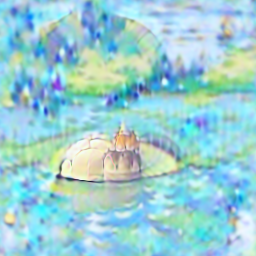


다음 이미지 생성 중.. (시간이 다소 걸립니다)


In [45]:
!rm -rf /content/CLIP/frames/*.*
model = Siren(in_features=2, out_features=3, hidden_features=256, hidden_layers=16, outermost_linear=False).cuda()
optimizer = torch.optim.Adam(model.parameters(), .00001)

for itt in range(stop_iter*frames_frequency):
    train()

In [46]:
# video

frames = []
img = os.listdir("/content/CLIP/frames")
img.sort()
for i in img:
    frames.append(imageio.imread("/content/CLIP/frames/"+i))
frames = np.array(frames)
imageio.mimsave('/content/CLIP/video.mp4', frames)
clear_output()

from IPython.display import HTML
import io
import base64
video = io.open('/content/CLIP/video.mp4', 'r+b').read()
encoded = base64.b64encode(video)
play_html = ('<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'.format(encoded.decode('ascii')))
HTML(data=play_html)

In [48]:
files.download('/content/CLIP/result.png')
files.download('/content/CLIP/video.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>